# **第7章: 単語ベクトル**
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

# 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [1]:
import gdown

url = 'https://drive.google.com/uc?export=download&confirm=pbef&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM'
output = 'GoogleNews-vectors-negative300.bin.gz'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&confirm=pbef&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
To: /content/GoogleNews-vectors-negative300.bin.gz
100%|██████████| 1.65G/1.65G [00:10<00:00, 158MB/s]


'GoogleNews-vectors-negative300.bin.gz'

In [ ]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

# 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

model.similarity()メソッドで2つの単語間のコサイン類似度を求められる．

In [ ]:
model.similarity('United_States', 'U.S.')

0.73107743

# 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

.most_similar()メソッドで指定した単語に最も類似した単語を求められる．topnまでの類似度上位単語とその類似度を得られる．

In [ ]:
model.most_similar('United_States', topn = 10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

# 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

.most_similarメソッドでは足すベクトルと引くベクトルをそれぞれ指定し，計算後のベクトルと類似度が高い単語とその類似度を得られる．

In [ ]:
model.most_similar(positive=['Spain','Athens'], negative=['Madrid'],topn=10)

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

# 64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [ ]:
!wget http://download.tensorflow.org/data/questions-words.txt

--2023-01-05 17:16:13--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.217.128, 2607:f8b0:400c:c13::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.217.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.002s  

2023-01-05 17:16:13 (261 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [ ]:
!head -10 questions-words.txt

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [ ]:
with open('questions-words.txt','r') as f1, open('questions-words-add.txt', 'w') as f2:
    for line in f1:
        line = line.split()
        if line[0] == ':':
            category = line[1]      #カテゴリを取得
        else:
            word, cos = model.most_similar(positive = [line[1],line[2]], negative = [line[0]], topn = 1)[0]
            f2.write(' '.join([category]+line+[word, str(cos) + '\n']))

[('Iraqi', 0.6351870894432068)]
[('Thailand', 0.7137669324874878)]
[('China', 0.7235777974128723)]
[('Germany', 0.6734622120857239)]
[('Switzerland', 0.4919748306274414)]
[('Egypt', 0.7527809739112854)]
[('Australia', 0.583732545375824)]
[('Viet_Nam', 0.6276341676712036)]
[('Cuba', 0.6460992097854614)]
[('Finland', 0.6899983882904053)]
[('Pakistan', 0.7233326435089111)]
[('Afghan', 0.6160915493965149)]
[('Britain', 0.5646188259124756)]
[('Spain', 0.703661322593689)]
[('Russia', 0.7382972240447998)]
[('Norway', 0.6470743417739868)]
[('Canada', 0.5912168025970459)]
[('France', 0.6724624633789062)]
[('Italy', 0.682619035243988)]
[('Sweden', 0.6757243871688843)]
[('Iran', 0.7671369910240173)]
[('Japan', 0.7256094217300415)]
[('Thailand', 0.6745353937149048)]
[('China', 0.6915649175643921)]
[('Germany', 0.6057408452033997)]
[('coach_Bobby_Curlings', 0.4347156882286072)]
[('Egypt', 0.6848488450050354)]
[('Mr_Rudd', 0.6186108589172363)]
[('Vietnam', 0.7493551969528198)]
[('Cuba', 0.7133255600

KeyboardInterrupt: ignored

# 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [ ]:
with open('questions-words-add.txt', 'r') as f:
    sem_cnt = 0     #意味的アナロジー（semantic analogy）の全体数
    sem_cor = 0     #意味的アナロジー（semantic analogy）の正解数
    syn_cnt = 0     #文法的アナロジー（syntactic analogy）の全体数
    syn_cor = 0     #文法的アナロジー（syntactic analogy）の正解数
    for line in f:
        line = line.split()
        if not line[0].startswith('gram'):      #カテゴリがgramで始まるかで意味的か文法的か判断
            sem_cnt += 1
            if line[4] == line[5]:      #正解
                sem_cor += 1
        else:
            syn_cnt += 1
            if line[4] == line[5]:
                syn_cor += 1

print(f'意味的アナロジー正解率：{sem_cor/sem_cnt:.3f}')
print(f'意味的アナロジー正解率：{syn_cor/syn_cnt:.3f}')

意味的アナロジー正解率：0.731
意味的アナロジー正解率：0.740


# 66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

スピアマン相関係数

順位データから求められる相関の指標．2つの変数の分布について何も仮定せずに，変数の間の関係が任意の単調関数によってどの程度忠実に表現できるかを，評価するものである．

下式で定義される．

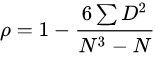

In [ ]:
!wget https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2023-01-05 19:27:36--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 208.97.177.37
Connecting to gabrilovich.com (gabrilovich.com)|208.97.177.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K  --.-KB/s    in 0.02s   

2023-01-05 19:27:37 (944 KB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        


In [ ]:
!head -10 './combined.csv'

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50


In [ ]:
ws353 = []
with open ('./combined.csv','r') as f:
    next(f)
    for line in f:
        line = [s.strip() for s in line.split(',')]
        line.append(model.similarity(line[0], line[1]))
        ws353.append(line)

for i in range(5):
    print(ws353[i])

['love', 'sex', '6.77', 0.2639377]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 0.99999994]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]


In [ ]:
import numpy as np
from scipy.stats import spearmanr

human = np.array(ws353).T[2]
w2v = np.array(ws353).T[3]
correlation, pvalue = spearmanr(human, w2v)

print(f'スピアマン相関係数:{correlation:.3f}')

スピアマン相関係数:0.685


# 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [ ]:
#国名の取得
countries = set()
with open('./questions-words-add.txt', 'r') as f:
    for line in f:
        line = line.split()
        if line[0] in ['capital-common-countries', 'capital-world']:
            countries.add(line[2])
        elif line[0] in ['currency', 'gram6-nationality-adjective']:
            countries.add(line[1])
countries = list(countries)

#国名に関する単語ベクトルを抽出
countries_vec = [model[country] for country in countries]

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

cluster 0
Bhutan, Bangladesh, China, Morocco, Laos, Syria, Nepal, Lebanon, Pakistan, Iran, Iraq, Jordan, Bahrain, Korea, Libya, Vietnam, Philippines, Indonesia, Taiwan, Japan, India, Cambodia, Malaysia, Fiji, Qatar, Israel, Australia, Egypt, Afghanistan, Oman, Thailand
cluster 1
Sudan, Eritrea, Gabon, Rwanda, Somalia, Botswana, Namibia, Tunisia, Zambia, Senegal, Kenya, Zimbabwe, Liberia, Angola, Gambia, Nigeria, Mozambique, Uganda, Niger, Ghana, Burundi, Guinea, Mali, Madagascar, Mauritania, Algeria, Malawi
cluster 2
Malta, Spain, England, France, Sweden, Austria, Liechtenstein, Italy, USA, Switzerland, Netherlands, Norway, Denmark, Ireland, Finland, Belgium, Germany, Tuvalu, Iceland, Canada, Portugal, Greenland, Europe
cluster 3
Kyrgyzstan, Kazakhstan, Macedonia, Bulgaria, Croatia, Tajikistan, Uzbekistan, Montenegro, Turkey, Estonia, Georgia, Serbia, Albania, Romania, Moldova, Slovakia, Turkmenistan, Russia, Armenia, Azerbaijan, Hungary, Poland, Belarus, Ukraine, Greece, Slovenia, Cyp

# 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

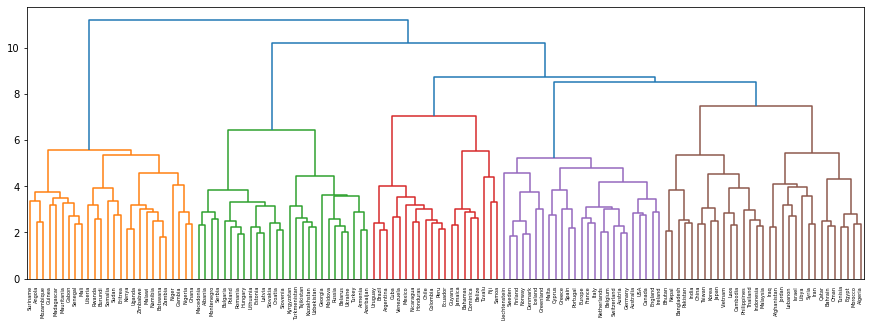

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 5))
Z = linkage(countries_vec, method='ward')
dendrogram(Z, labels=countries)
plt.show()

# 69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

In [ ]:
!pip install bhtsne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 KB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bhtsne: filename=bhtsne-0.1.9-cp38-cp38-linux_x86_64.whl size=221017 sha256=8a09ac51c1f8919da5ed22b257b6f6fb2d8cc1c5d565fc422f7c53d23b0e9a7e
  Stored in directory: /root/.cache/pip/wheels/aa/c7/a8/6d827fea433c4238dad92d6012d1f5249e8af6e7cf020cabe1
Successfully built bhtsne


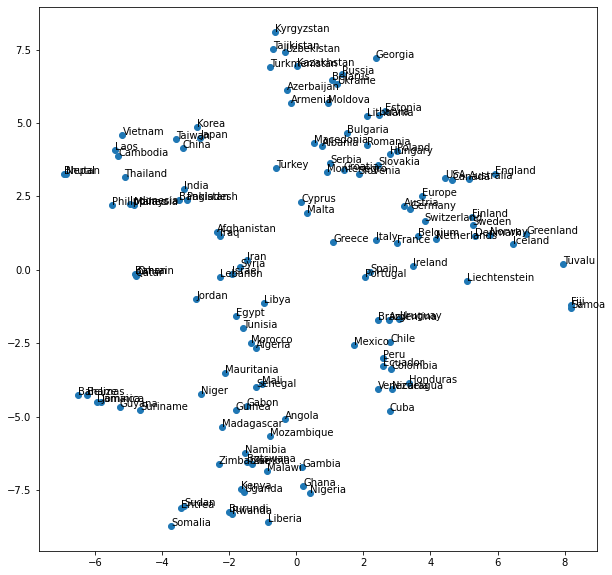

In [ ]:
import bhtsne

embedded = bhtsne.tsne(np.array(countries_vec).astype(np.float64), dimensions=2, rand_seed=123)
plt.figure(figsize=(10, 10))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
for (x, y), name in zip(embedded, countries):
    plt.annotate(name, (x, y))
plt.show()